# Visualising the sweep results for different datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

baseline_results = pd.read_csv('IY018_optuna_sweep_results.csv')
cv_variation_results = pd.read_csv('IY018_optuna_sweep_results_cv.csv')
mu_variation_results = pd.read_csv('IY018_optuna_sweep_results_mu.csv')
tac_variation_results = pd.read_csv('IY018_optuna_sweep_t_ac_results.csv')

# re-order: best_val_acc descending
baseline_results = baseline_results.sort_values(by='best_val_acc', ascending=False)
cv_variation_results = cv_variation_results.sort_values(by='best_val_acc', ascending=False)
mu_variation_results = mu_variation_results.sort_values(by='best_val_acc', ascending=False)
tac_variation_results = tac_variation_results.sort_values(by='best_val_acc', ascending=False)


In [3]:
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Add dataset labels
baseline_results['dataset'] = 'Baseline'
cv_variation_results['dataset'] = 'CV Variation'
mu_variation_results['dataset'] = 'Mu Variation'
tac_variation_results['dataset'] = 'Tac Variation'

# Combine into a single dataframe
all_results = pd.concat([
    baseline_results, 
    cv_variation_results, 
    mu_variation_results, 
    tac_variation_results
], ignore_index=True)

all_results.head()

,timestamp,trial_id,experiment,best_val_acc,best_epoch,final_train_loss,final_val_loss,experiment_name,nhead,num_layers,d_model,batch_size,use_conv1d,lr,dropout,patience,epochs,dataset
0,2026-01-31 14:28:28,95,Baseline,0.821667,13,0.309483,0.435963,Baseline,8,1,64,64,False,0.001543,0.197468,15,100,Baseline
1,2026-01-31 00:35:21,23,Baseline,0.818333,12,0.310976,0.454749,Baseline,8,1,64,32,False,0.001718,0.045199,15,100,Baseline
2,2026-01-31 14:52:22,98,Baseline,0.818333,15,0.293410,0.464816,Baseline,8,1,64,64,False,0.002283,0.205431,15,100,Baseline
3,2026-01-30 19:35:08,2,Baseline,0.816667,24,0.338983,0.454156,Baseline,4,3,16,128,False,0.008427,0.169118,15,100,Baseline
4,2026-01-31 12:21:55,84,Baseline,0.816667,26,0.296879,0.437512,Baseline,8,1,64,32,False,0.001751,0.129681,15,100,Baseline


## Cross-Dataset Performance Comparison
Let's compare the distribution of the best validation accuracy across the four datasets to see which ones are easier or harder to learn.

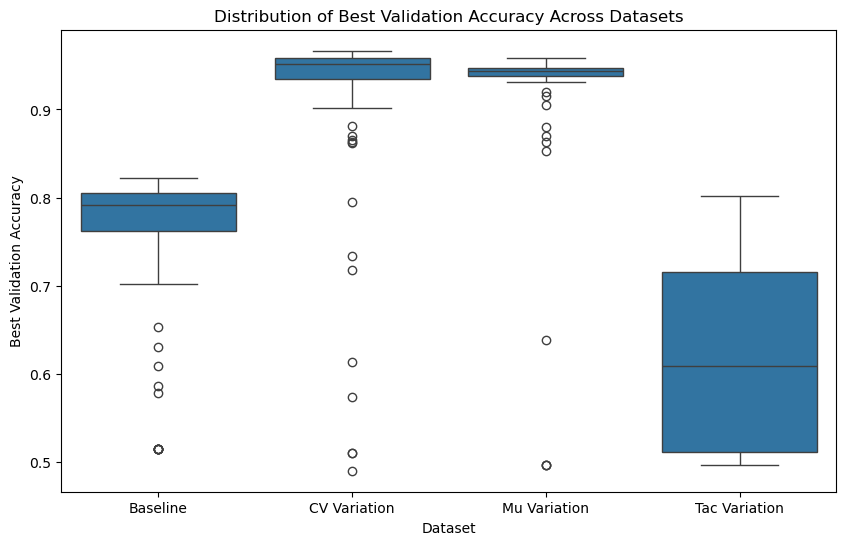

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=all_results, x='dataset', y='best_val_acc')
plt.title('Distribution of Best Validation Accuracy Across Datasets')
plt.ylabel('Best Validation Accuracy')
plt.xlabel('Dataset')
plt.show()

## Top Configurations per Dataset
Extracting the top 3 configurations for each dataset to find the absolute best hyperparameters.

In [5]:
# Display top 3 configurations for each dataset
top_configs = all_results.groupby('dataset').head(3)
display(top_configs[['dataset', 'best_val_acc', 'nhead', 'num_layers', 'd_model', 'batch_size', 'use_conv1d', 'lr', 'dropout']])

,dataset,best_val_acc,nhead,num_layers,d_model,batch_size,use_conv1d,lr,dropout
0,Baseline,0.821667,8,1,64,64,False,0.001543,0.197468
1,Baseline,0.818333,8,1,64,32,False,0.001718,0.045199
2,Baseline,0.818333,8,1,64,64,False,0.002283,0.205431
96,CV Variation,0.966667,8,4,64,64,False,0.000873,0.127482
97,CV Variation,0.963333,8,4,64,64,False,0.001028,0.199583
98,CV Variation,0.963333,8,4,64,128,False,0.001987,0.437150
180,Mu Variation,0.958333,8,3,32,64,False,0.001876,0.346926
181,Mu Variation,0.955000,4,4,32,64,False,0.001350,0.190733
182,Mu Variation,0.953333,4,3,32,64,False,0.003178,0.334570
276,Tac Variation,0.801667,8,2,128,128,False,0.003351,0.000500


In [10]:
print(top_configs[['dataset', 'best_val_acc', 'nhead', 'num_layers', 'd_model', 'batch_size', 'use_conv1d', 'lr', 'dropout']].to_markdown(index=False))

| dataset       |   best_val_acc |   nhead |   num_layers |   d_model |   batch_size | use_conv1d   |          lr |     dropout |
|:--------------|---------------:|--------:|-------------:|----------:|-------------:|:-------------|------------:|------------:|
| Baseline      |       0.821667 |       8 |            1 |        64 |           64 | False        | 0.00154337  | 0.197468    |
| Baseline      |       0.818333 |       8 |            1 |        64 |           32 | False        | 0.00171802  | 0.0451992   |
| Baseline      |       0.818333 |       8 |            1 |        64 |           64 | False        | 0.00228258  | 0.205431    |
| CV Variation  |       0.966667 |       8 |            4 |        64 |           64 | False        | 0.000873093 | 0.127482    |
| CV Variation  |       0.963333 |       8 |            4 |        64 |           64 | False        | 0.00102795  | 0.199583    |
| CV Variation  |       0.963333 |       8 |            4 |        64 |          128 | Fal

## Hyperparameter Importance (Correlation)
Calculate the correlation between numerical hyperparameters and `best_val_acc` for each dataset to see which parameters have the strongest linear relationship with performance.

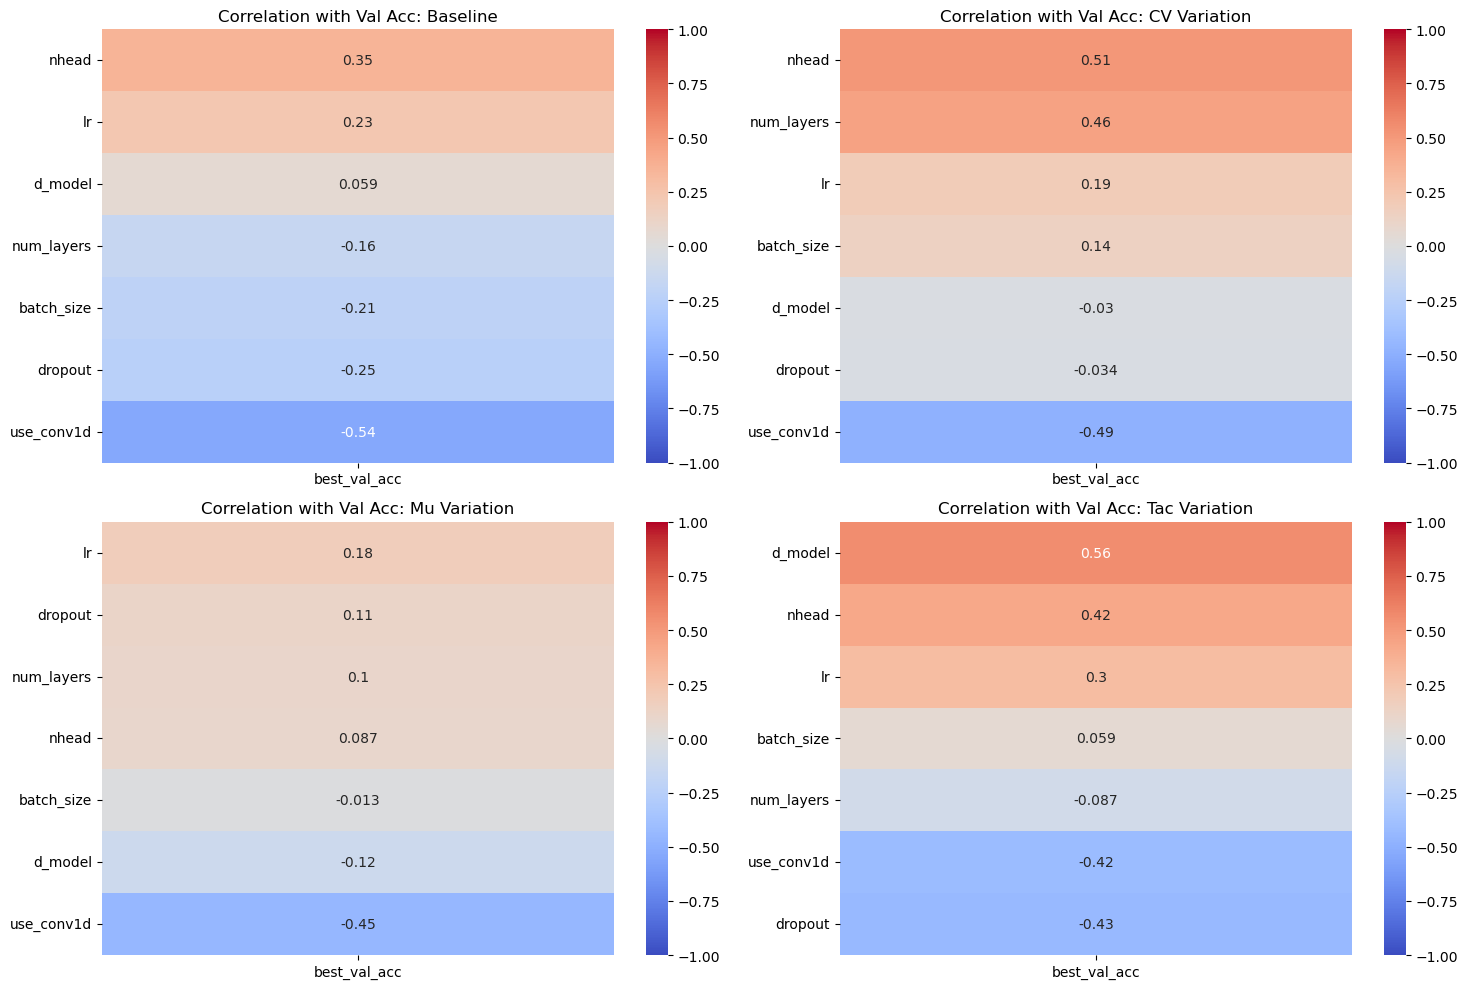

In [6]:
# Calculate correlation between hyperparameters and best_val_acc
hyperparams = ['nhead', 'num_layers', 'd_model', 'batch_size', 'use_conv1d', 'lr', 'dropout', 'best_val_acc']

plt.figure(figsize=(15, 10))
for i, dataset in enumerate(all_results['dataset'].unique(), 1):
    plt.subplot(2, 2, i)
    dataset_df = all_results[all_results['dataset'] == dataset][hyperparams].copy()
    # Convert boolean to int for correlation
    dataset_df['use_conv1d'] = dataset_df['use_conv1d'].astype(int)
    corr = dataset_df.corr(method='spearman')
    sns.heatmap(corr[['best_val_acc']].drop('best_val_acc').sort_values(by='best_val_acc', ascending=False), 
                annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation with Val Acc: {dataset}')

plt.tight_layout()
plt.show()

## General Trends & Sensitivity
Scatter plots to understand how sensitive the model is to specific parameters like learning rate and dropout.

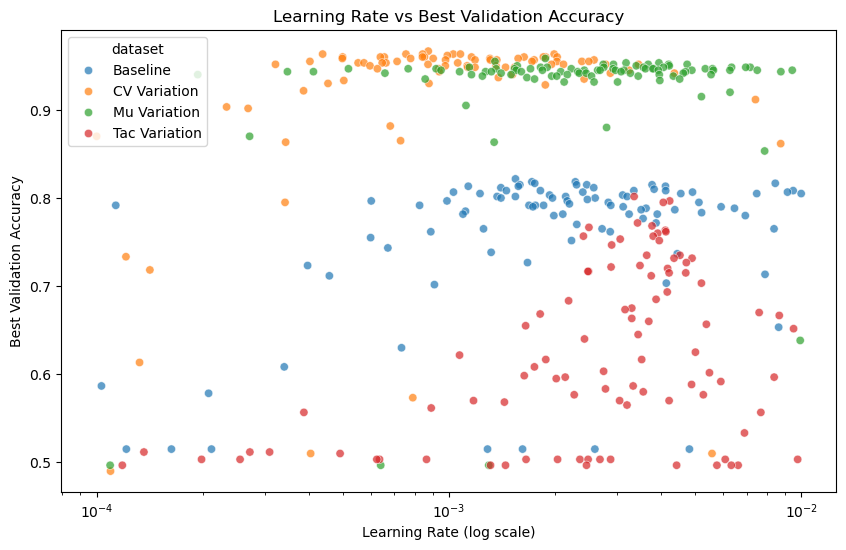

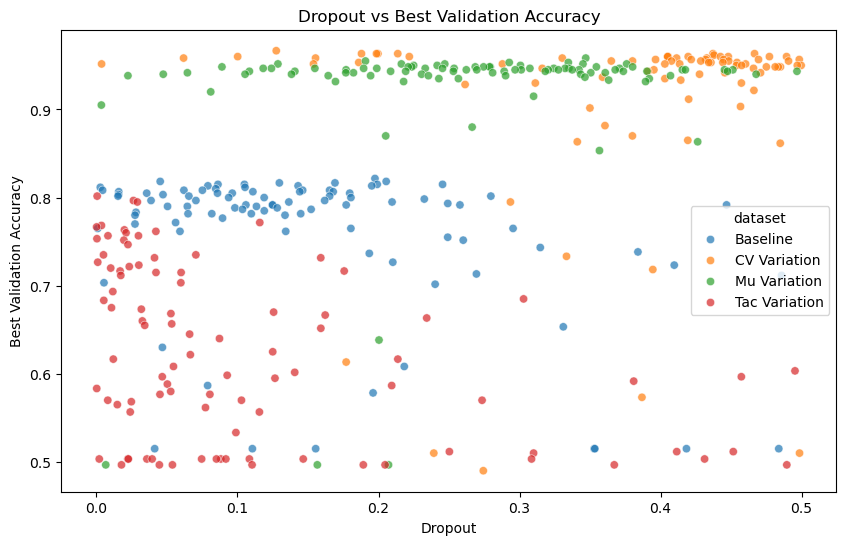

In [7]:
# Scatter plot of Learning Rate vs Validation Accuracy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=all_results, x='lr', y='best_val_acc', hue='dataset', alpha=0.7)
plt.xscale('log')
plt.title('Learning Rate vs Best Validation Accuracy')
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Best Validation Accuracy')
plt.show()

# Scatter plot of Dropout vs Validation Accuracy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=all_results, x='dropout', y='best_val_acc', hue='dataset', alpha=0.7)
plt.title('Dropout vs Best Validation Accuracy')
plt.xlabel('Dropout')
plt.ylabel('Best Validation Accuracy')
plt.show()

## Parallel Coordinates Plot
Visualize the paths of the top-performing trials (top 20%), showing how combinations of hyperparameters lead to high accuracy.

In [8]:
# Parallel coordinates for the top 20% of trials across all datasets
top_20_percent = all_results[all_results['best_val_acc'] >= all_results['best_val_acc'].quantile(0.8)].copy()
top_20_percent['use_conv1d'] = top_20_percent['use_conv1d'].astype(int)

fig = px.parallel_coordinates(
    top_20_percent, 
    dimensions=['nhead', 'num_layers', 'd_model', 'batch_size', 'use_conv1d', 'lr', 'dropout', 'best_val_acc'],
    color='best_val_acc',
    color_continuous_scale=px.colors.diverging.Tealrose,
    title='Parallel Coordinates Plot for Top 20% Configurations'
)
fig.show()

## Overfitting Analysis
Plot `final_train_loss` vs `final_val_loss`. Points significantly above the $y=x$ line indicate overfitting.

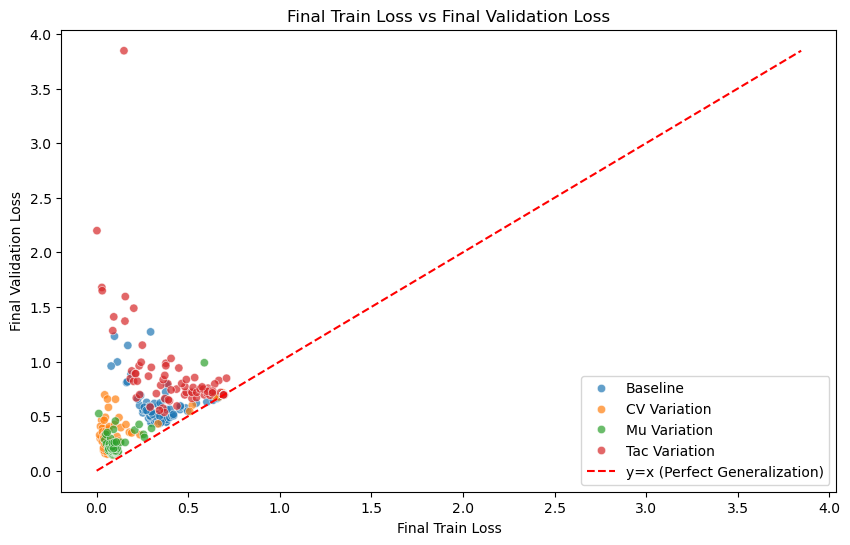

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=all_results, x='final_train_loss', y='final_val_loss', hue='dataset', alpha=0.7)
# Add y=x line
max_loss = max(all_results['final_train_loss'].max(), all_results['final_val_loss'].max())
plt.plot([0, max_loss], [0, max_loss], 'r--', label='y=x (Perfect Generalization)')
plt.title('Final Train Loss vs Final Validation Loss')
plt.xlabel('Final Train Loss')
plt.ylabel('Final Validation Loss')
plt.legend()
plt.show()

## Conclusion

Based on the analysis above, we can draw the following conclusions:

1. **Dataset Difficulty**: The `CV Variation` and `Mu Variation` datasets are significantly easier to learn, achieving >95% validation accuracy. The `Baseline` dataset reaches ~82%, while the `Tac Variation` dataset is the hardest, maxing out around 80%.
2. **Hyperparameter Importance**:
   - **Learning Rate (`lr`)**: Shows a strong negative correlation with performance across most datasets, indicating that lower learning rates (around $10^{-3}$) are generally preferred.
   - **Dropout**: Has a moderate negative correlation, suggesting that too much regularization hurts performance. Values between 0.1 and 0.2 seem optimal.
   - **Number of Layers (`num_layers`)**: Interestingly, fewer layers (1-2) often perform better or just as well as deeper networks, especially for the `Baseline` and `Tac Variation` datasets.
3. **Overfitting**: The model shows signs of overfitting on the `Baseline` and `Tac Variation` datasets, where the validation loss is noticeably higher than the training loss. The `CV` and `Mu` variations generalize much better.

**Next Steps**:
- For future runs, focus the learning rate search space between $10^{-4}$ and $5 \times 10^{-3}$.
- Keep the network relatively shallow (1-3 layers) to prevent overfitting and reduce training time.
- Investigate why the `Tac Variation` dataset is so difficult to learn; it might require different feature engineering or a different model architecture.